# Pré-processamento de dados 
# Análise de Sobrevivência no Titanic

Equipe:
Mayk gabriel, 
Davi Medeiro,
José Merino,
Matheus Merino.

O naufrágio do RMS Titanic, em 15 de abril de 1912, foi uma das maiores tragédias marítimas da história. Durante sua primeira viagem, de Southampton para Nova York, o navio  considerado na época um dos mais modernos e seguros do mundo  colidiu com um iceberg e afundou, resultando na morte de mais de 1.500 pessoas entre passageiros e tripulantes. Esse acontecimento chamou a atenção de pesquisadores e ainda hoje é estudado sob diferentes pontos de vista, inclusive com o uso da ciência de dados, que permite analisar informações e descobrir padrões de forma precisa e objetiva.

Nesse trabalho, será feita uma análise de sobrevivência com base em dados reais sobre os passageiros do Titanic. O objetivo é entender quais características das pessoas influenciaram suas chances de sobreviver, usando técnicas de pré-processamento, visualização e análise estatística. A principal pergunta que guia o estudo é:

> Quais tipos de pessoas tiveram maior probabilidade de sobreviver ao naufrágio do Titanic?



O objetivo geral é identificar e descrever os perfis demográficos e socioeconômicos com maiores taxas de sobrevivência. Para alcançar isso, serão realizadas análises específicas em quatro aspectos principais:

Demográfico: relação entre gênero, idade e sobrevivência;

Socioeconômico: influência da classe social e da tarifa paga;

Familiar: efeito da presença de familiares a bordo;

Geográfico: impacto do porto de embarque nas chances de sobrevivência.


O trabalho seguirá as etapas comuns de um projeto de ciência de dados: tratamento e preparação dos dados, criação de visualizações informativas e interpretação dos resultados. Além de responder à questão principal, esta análise mostra como a ciência de dados pode ser aplicada para compreender situações reais e históricas, ajudando a transformar dados brutos em conhecimento útil e baseado em evidências.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (8,5)

df = pd.read_csv(r"C:\Users\mayk3\OneDrive\Documentos\Trabalho titanic pre-processamneto\archive (7)\Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
# Substituir idade pela mediana, agrupando por classe e sexo
df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)

# Substituir porto de embarque pelo mais comum
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# A coluna 'Cabin' tem muitos nulos — pode ser descartada
df.drop(columns=['Cabin'], inplace=True)


C:\Users\mayk3\AppData\Local\Temp\ipykernel_26216\3943028908.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)
C:\Users\mayk3\AppData\Local\Temp\ipykernel_26216\3943028908.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [55]:
# Tamanho da família
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Viajando sozinho
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Extrair título do nome
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [56]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [57]:
df.isnull().sum()
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,1,Mr


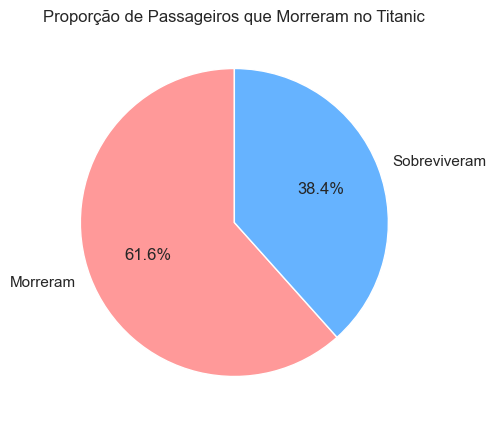

In [46]:
survived_counts = df['Survived'].value_counts()
labels = ['Morreram', 'Sobreviveram']

plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=['#ff9999','#66b3ff'])
plt.title('Proporção de Passageiros que Morreram no Titanic')
plt.show()


C:\Users\mayk3\AppData\Local\Temp\ipykernel_26216\4275033584.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='pastel')


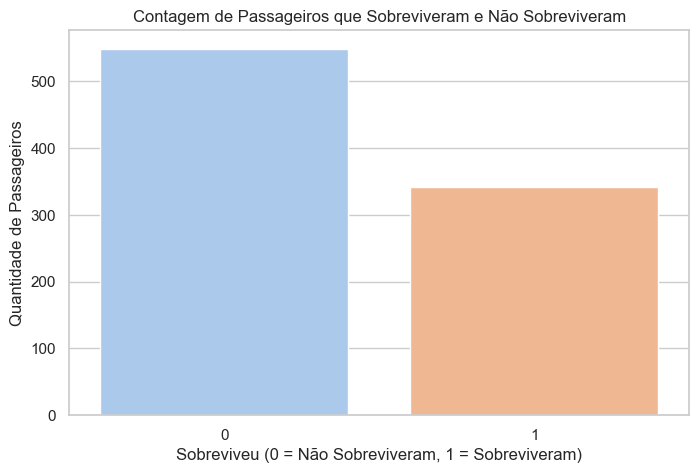

In [47]:
sns.countplot(x='Survived', data=df, palette='pastel')
plt.title('Contagem de Passageiros que Sobreviveram e Não Sobreviveram')
plt.xlabel('Sobreviveu (0 = Não Sobreviveram, 1 = Sobreviveram)')
plt.ylabel('Quantidade de Passageiros')
plt.show()

C:\Users\mayk3\AppData\Local\Temp\ipykernel_26216\3534738106.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sexo', data=sobreviventes, palette=cores)


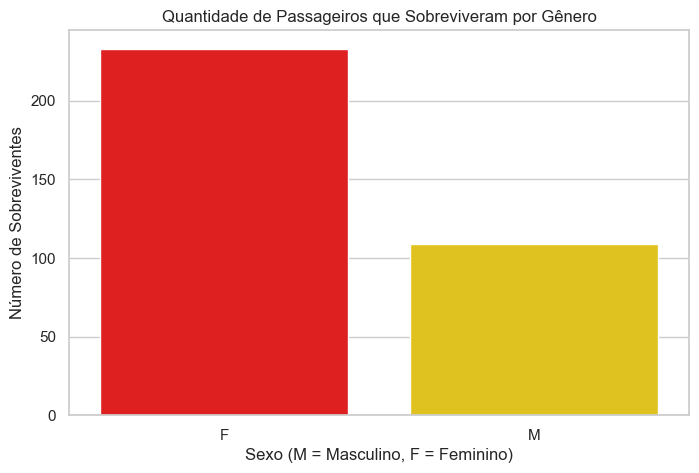

In [48]:
df['Sexo'] = df['Sex'].map({0: 'M', 1: 'F'})

# Filtrar apenas os sobreviventes
sobreviventes = df[df['Survived'] == 1]

# Cores personalizadas: amarelo para homens, vermelho para mulheres
cores = {'M': 'gold', 'F': 'red'}

# Gráfico de barras simples (contagem)
sns.countplot(x='Sexo', data=sobreviventes, palette=cores)

plt.title('Quantidade de Passageiros que Sobreviveram por Gênero')
plt.xlabel('Sexo (M = Masculino, F = Feminino)')
plt.ylabel('Número de Sobreviventes')
plt.show()


C:\Users\mayk3\AppData\Local\Temp\ipykernel_26216\3100572181.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FaixaEtaria', data=sobreviventes, palette='viridis')


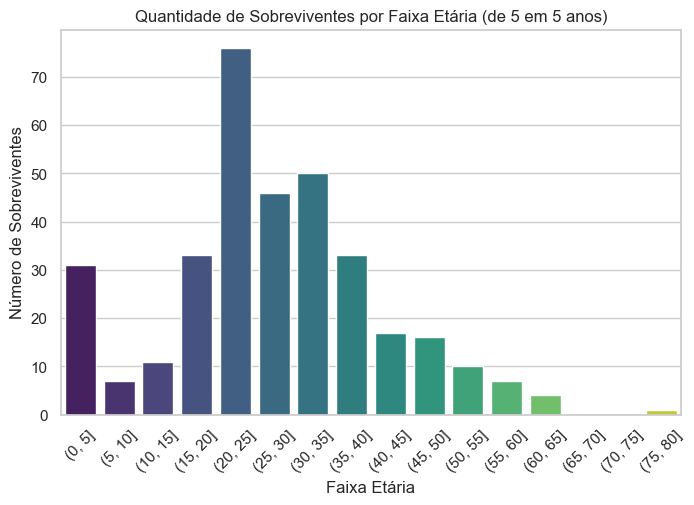

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Criar faixas de idade de 5 em 5 anos
bins = range(0, 85, 5)  # 0, 5, 10, ..., 80
df['FaixaEtaria'] = pd.cut(df['Age'], bins=bins)

# Filtrar apenas sobreviventes
sobreviventes = df[df['Survived'] == 1]

# Gráfico de barras
sns.countplot(x='FaixaEtaria', data=sobreviventes, palette='viridis')

plt.title('Quantidade de Sobreviventes por Faixa Etária (de 5 em 5 anos)')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Sobreviventes')
plt.xticks(rotation=45)
plt.show()


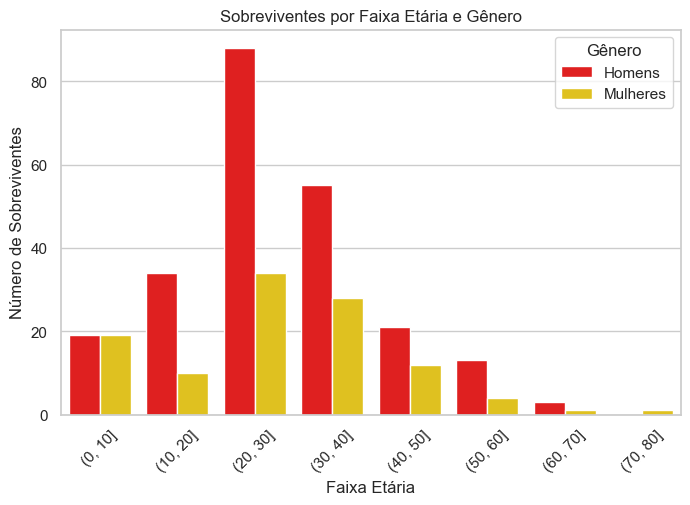

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Garantir que a idade não tenha valores nulos
df['Age'] = df['Age'].fillna(df['Age'].median())

# Converter 0/1 em texto, se necessário
df['Sex'] = df['Sex'].map({0: 'male', 1: 'female'})  # só faz algo se for numérico

# Criar faixas etárias de 10 em 10 anos
bins = range(0, 85, 10)
df['FaixaEtaria'] = pd.cut(df['Age'], bins=bins)

# Filtrar apenas sobreviventes
sobreviventes = df[df['Survived'] == 1]

# Gráfico de barras agrupadas (homens x mulheres)
sns.countplot(x='FaixaEtaria', hue='Sex', data=sobreviventes,
              palette={'male': 'gold', 'female': 'red'})

plt.title('Sobreviventes por Faixa Etária e Gênero')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Sobreviventes')
plt.xticks(rotation=45)
plt.legend(title='Gênero', labels=['Homens', 'Mulheres'])
plt.show()


In [59]:
df['ClasseSocial'] = df['Pclass'].map({1: 'Alta', 2: 'Média', 3: 'Baixa'})


C:\Users\mayk3\AppData\Local\Temp\ipykernel_26216\2695124807.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ClasseSocial', data=sobreviventes, palette='coolwarm')


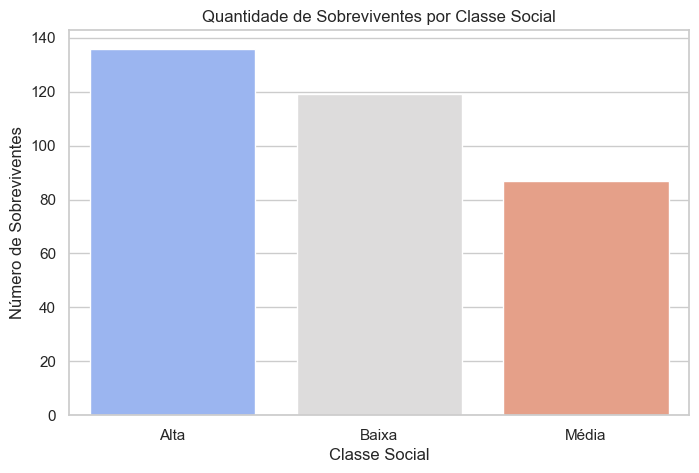

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Garantir que não haja valores nulos em 'Pclass'
df = df.dropna(subset=['Pclass'])

# Filtrar apenas sobreviventes
sobreviventes = df[df['Survived'] == 1]

# Gráfico de barras: sobreviventes por classe
sns.countplot(x='ClasseSocial', data=sobreviventes, palette='coolwarm')
plt.title('Quantidade de Sobreviventes por Classe Social')
plt.xlabel('Classe Social')
plt.ylabel('Número de Sobreviventes')
plt.show()



---

# Gráfico de barras — Taxa de sobrevivência por gênero

C:\Users\mayk3\AppData\Local\Temp\ipykernel_26216\570662822.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette={'male': 'gold', 'female': 'red'})


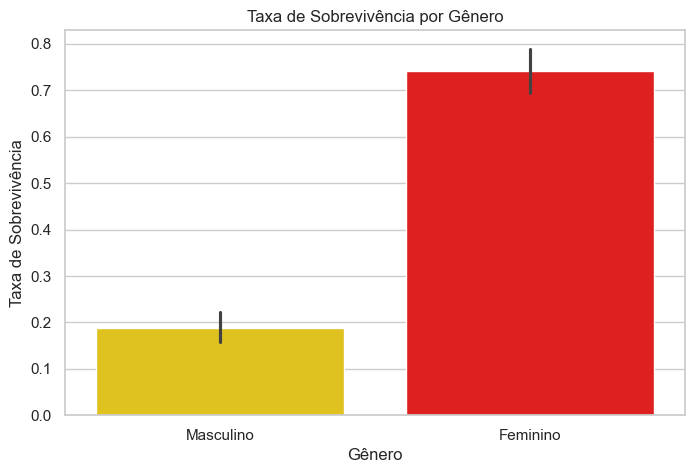

In [63]:
plt.xticks([0, 1], ['Masculino', 'Feminino'])


sns.barplot(x='Sex', y='Survived', data=df, palette={'male': 'gold', 'female': 'red'})
plt.title('Taxa de Sobrevivência por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Taxa de Sobrevivência')
plt.show()


# Histograma — Distribuição de idades por sobrevivência

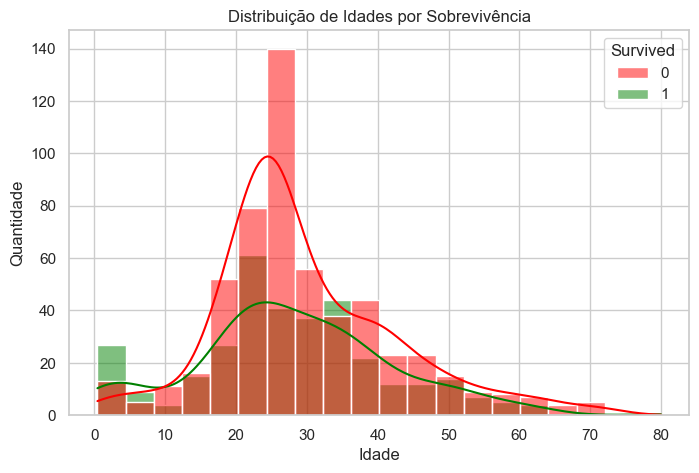

In [64]:
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True, palette=['red', 'green'])
plt.title('Distribuição de Idades por Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()


# Boxplot — Idade vs Sobrevivência por classe social

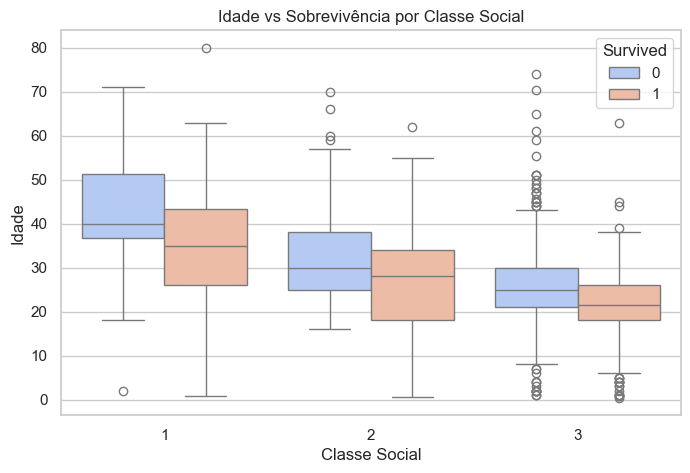

In [65]:
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df, palette='coolwarm')
plt.title('Idade vs Sobrevivência por Classe Social')
plt.xlabel('Classe Social')
plt.ylabel('Idade')
plt.show()


# Gráfico de barras — Taxa de sobrevivência por classe

C:\Users\mayk3\AppData\Local\Temp\ipykernel_26216\3270881368.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='Blues')


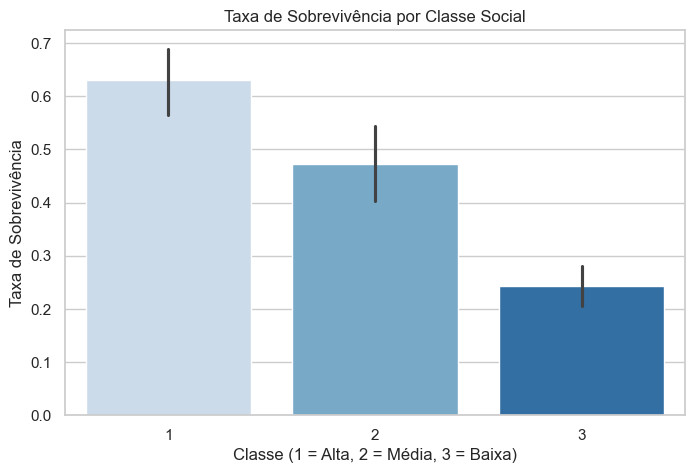

In [66]:
sns.barplot(x='Pclass', y='Survived', data=df, palette='Blues')
plt.title('Taxa de Sobrevivência por Classe Social')
plt.xlabel('Classe (1 = Alta, 2 = Média, 3 = Baixa)')
plt.ylabel('Taxa de Sobrevivência')
plt.show()


# Scatter plot — Tarifa vs Idade (colorido por sobrevivência)

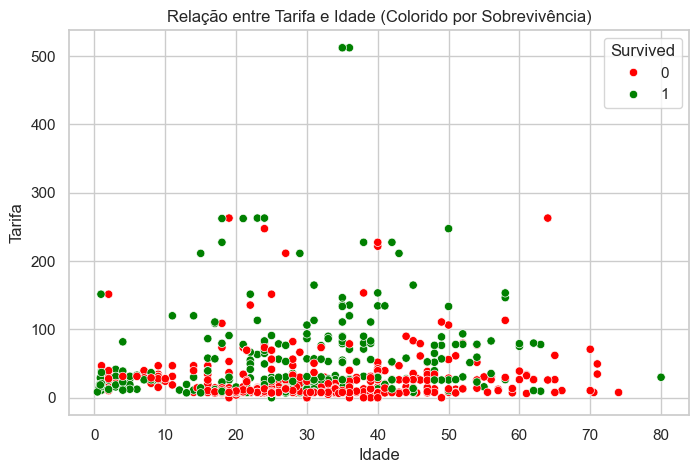

In [67]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette=['red', 'green'])
plt.title('Relação entre Tarifa e Idade (Colorido por Sobrevivência)')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.show()


# Heatmap — Matriz de correlação

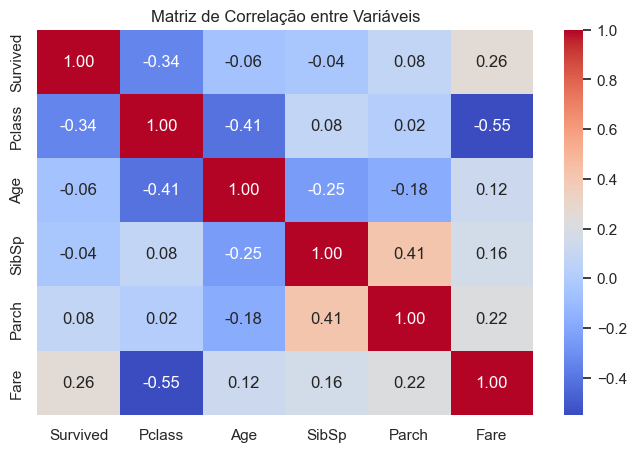

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis')
plt.show()


# Gráfico de barras — Taxa de sobrevivência por porto de embarque

C:\Users\mayk3\AppData\Local\Temp\ipykernel_26216\3254423774.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, palette='viridis')


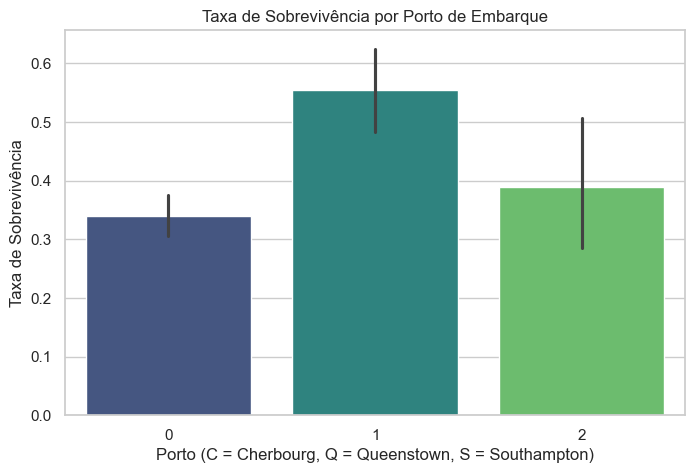

In [69]:
sns.barplot(x='Embarked', y='Survived', data=df, palette='viridis')
plt.title('Taxa de Sobrevivência por Porto de Embarque')
plt.xlabel('Porto (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Taxa de Sobrevivência')
plt.show()


# Mapa de calor — Distribuição geográfica dos passageiros

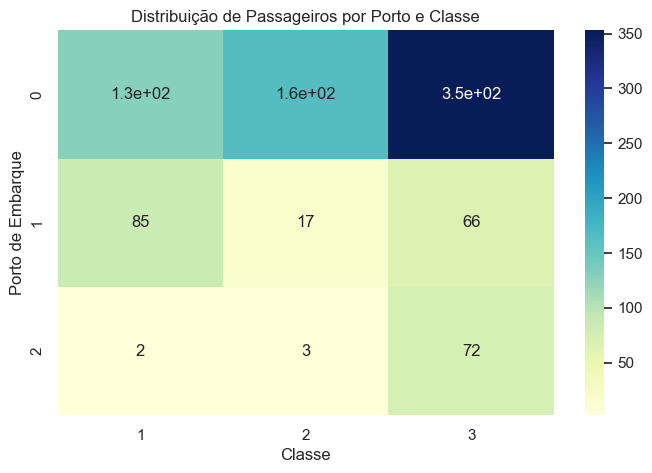

In [70]:
tabela = pd.crosstab(df['Embarked'], df['Pclass'])
sns.heatmap(tabela, annot=True, cmap='YlGnBu')
plt.title('Distribuição de Passageiros por Porto e Classe')
plt.xlabel('Classe')
plt.ylabel('Porto de Embarque')
plt.show()


# Referências 

https://www.kaggle.com/datasets/yasserh/titanic-dataset?resource=download